## Leitura do arquivo

Neste projeto, utilizamos o dataset fornecido pelo professor instrutor Victor Hayashi, que está disponível para acesso através do link "https://www.kaggle.com/datasets/shubhammehta21/movie-lens-small-latest-dataset".

O dataset "ratings" contém informações relevantes sobre avaliações de filmes, incluindo os campos:

*   userId - id do usuário
*   movieId - id dos filme
*   rating - avaliação feita pelo usuário
*   timestamp: - hora em que foi realizada a avaliação

Outro que também usaremos será o de "movies", ele contém as seguintes colunas:
* movieID - id dos filme
* title - título do filme
* genres - gênero do filme

O objetivo deste projeto é realizar análises e aplicar técnicas de processamento de dados nesse conjunto de dados, a fim de obter insights valiosos sobre as preferências e comportamentos dos usuários em relação aos filmes avaliados. A partir dessas análises, poderemos extrair informações úteis para recomendações personalizadas e tomada de decisões relacionadas ao domínio dos filmes.

**Critérios avaliativos**

**Construção da Base de Dados**

O grupo deve disponibilizar um arquivo no formato CSV com a primeira linha contendo informações de rótulos das colunas e, ao menos, as colunas de identificação do usuário, identificação do item e ranking (feedback do usuário sobre o item específico).

Mostrem que o dataset está balanceado. O grupo também deve incluir no seu README, no GitHub, uma descrição breve sobre o dataset.

**Critérios de qualidade:**
*   Arquivo acessível por Drive ou GitHub (eliminatório).
*   Primeira linha do arquivo contém rótulos das colunas (2,5 pontos)
*   O dataset possui colunas de identificação do usuário, identificação do item e ranking (2,5 pontos).
*   O dataset está balanceado e o grupo mostrou isso (2,5 pontos)
*   A descrição do dataset no GitHub está no README e contém informações sobre o número de registros e colunas presentes na base de dados (2,5 pontos).

In [ ]:
import pandas as pd
from google_drive_downloader import GoogleDriveDownloader as gdd
from google_drive_downloader import GoogleDriveDownloader as gdd
from google.colab import drive

drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
movies = pd.read_csv('/content/drive/My Drive/datasets/movies.csv') # dataframe de filmes com as colunas movieID, title, genres
ratings = pd.read_csv('/content/drive/My Drive/datasets/ratings.csv') # dataframe de avaliações com as colunas userID, movieID, rating e timestamp
projetos = pd.read_csv('/content/drive/My Drive/datasets/projetos.csv') # dataframe teste feito por membros do grupo Lírios que contém projectID, title e technology_1, technology_2 e technology_3

In [ ]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
projetos.head()

,projectID,title,technology_1,technology_2,technology_3
0,1,Desenvolvimento de um aplicativo de gestão de ...,Python,Flutter,Mobile
1,2,Criação de um website responsivo utilizando HT...,HTML,CSS,JavaScript
2,3,Implementação de um sistema de recomendação de...,Python,Machine Learning,Sistema Legado
3,4,Construção de um chatbot para atendimento ao c...,Python,IA,Machine Learning
4,5,Desenvolvimento de um sistema de controle de e...,Data,Gestão de Projetos,SQL


In [ ]:
movies.shape # tamanho do dataframe

(9742, 3)

## Formação de um dataframe único, com os usuários e suas respectivas avaliações para os filmes.

In [ ]:
data = pd.pivot(index = 'movieId',columns = 'userId', data = ratings,values ='rating')
data.head() # formação de um dataframe único

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,NaN,NaN,4.0,NaN,4.5,NaN,NaN,NaN,...,4.0,NaN,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,...,NaN,4.0,NaN,5.0,3.5,NaN,NaN,2.0,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.shape # tamanho do novo dataframe

(9724, 610)

### Limpeza dos dados

In [ ]:
data.isnull().sum()
# verificação de nulos

userId
1      9492
2      9695
3      9685
4      9508
5      9680
       ... 
606    8609
607    9537
608    8893
609    9687
610    8422
Length: 610, dtype: int64

Substituição dos nulos por 0

In [ ]:
data.fillna(0,inplace = True)
data.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9724 entries, 1 to 193609
Columns: 610 entries, 1 to 610
dtypes: float64(610)
memory usage: 45.3 MB


In [ ]:
data.describe()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
count,9724.000000,9724.000000,9724.000000,9724.000000,9724.000000,9724.000000,9724.000000,9724.000000,9724.000000,9724.000000,...,9724.000000,9724.000000,9724.000000,9724.000000,9724.000000,9724.000000,9724.00000,9724.000000,9724.000000,9724.000000
mean,0.104175,0.011775,0.009770,0.078980,0.016454,0.112814,0.050494,0.017277,0.015426,0.047203,...,0.045969,0.047100,0.340189,0.035788,0.072964,0.419375,0.07281,0.267842,0.012443,0.493881
std,0.677694,0.219604,0.201958,0.559284,0.252798,0.636188,0.433623,0.256780,0.239923,0.415098,...,0.451089,0.413247,1.098495,0.359062,0.494075,1.190866,0.53687,0.931256,0.203207,1.294729
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,4.000000,5.000000


In [ ]:
data.shape

(9724, 610)

## Criação de novas métricas

Quantas avaliações cada filme recebeu. Cada avaliação corresponde a um usuário, logo, o número de avaliações também corresponde ao número de usuários que avaliaram o filme

In [ ]:
numberOf_user_voted_for_movie = pd.DataFrame(ratings.groupby('movieId')['rating'].agg('count'))
numberOf_user_voted_for_movie.reset_index(level = 0,inplace = True)
numberOf_user_voted_for_movie.head()

,movieId,rating
0,1,215
1,2,110
2,3,52
3,4,7
4,5,49


Métrica de quantos filmes cada usuário avaliou.

In [ ]:
numberOf_movies_voted_by_user = pd.DataFrame(ratings.groupby('userId')['rating'].agg('count'))
numberOf_movies_voted_by_user.reset_index(level = 0,inplace = True)
numberOf_movies_voted_by_user.head()

,userId,rating
0,1,232
1,2,29
2,3,39
3,4,216
4,5,44


## Criação do dataframe final

Para o dataframe final, só serão considerados filmes com mais de 10 avaliações e usuários que avaliaram mais de 60 vezes. Assim, teremos mais segurança sobre as avaliações realizadas.

In [ ]:
data_final = data.loc[numberOf_user_voted_for_movie[numberOf_user_voted_for_movie['rating'] > 10]['movieId'],:]
data_final = data_final.loc[:,numberOf_movies_voted_by_user[numberOf_movies_voted_by_user['rating'] > 60]['userId']]
data_final.shape

(2121, 334)

Transformando em matriz esparsa por conta da grande quantidade de 0´s no dataframe

In [ ]:
from scipy.sparse import csr_matrix
csr_data = csr_matrix(data_final.values)
data_final.reset_index(inplace=True)


In [ ]:
data_final.head()

userId,movieId,1,4,6,7,10,11,15,16,17,...,600,601,602,603,604,605,606,607,608,610
0,1,4.0,0.0,0.0,4.5,0.0,0.0,2.5,0.0,4.5,...,2.5,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,5.0
1,2,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0
2,3,4.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
3,5,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.5,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
4,6,4.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,0.0,...,0.0,0.0,3.0,4.0,3.0,0.0,0.0,0.0,0.0,5.0


## Modelo de recomendação de filmes

Usando KNN e passando um nome de filme como input, o sistema de recomendação devolve uma lista de 10 filmes.

In [ ]:
from sklearn.neighbors import NearestNeighbors
knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20)
knn.fit(csr_data)
def get_movie_recommendation(movie_name):
    n_movies_to_reccomend = 10
    movie_list = movies[movies['title'].str.contains(movie_name)]
    if len(movie_list):
        movie_idx= movie_list.iloc[0]['movieId']
        movie_idx = data_final[data_final['movieId'] == movie_idx].index[0]
        distances , indices = knn.kneighbors(csr_data[movie_idx],n_neighbors=n_movies_to_reccomend+1)
        rec_movie_indices = sorted(list(zip(indices.squeeze().tolist(),distances.squeeze().tolist())),key=lambda x: x[1])[:0:-1]
        recommend_frame = []
        for val in rec_movie_indices:
            movie_idx = data_final.iloc[val[0]]['movieId']
            idx = movies[movies['movieId'] == movie_idx].index
            recommend_frame.append({'Title':movies.iloc[idx]['title'].values[0],'Distance':val[1]})
        df = pd.DataFrame(recommend_frame,index=range(1,n_movies_to_reccomend+1))
        print(df)
        return df
    else:
        return "No movies found. Please check your input"

In [ ]:
get_movie_recommendation('Kung Fu Panda')

                              Title  Distance
1                Toy Story 3 (2010)  0.441266
2   How to Train Your Dragon (2010)  0.440197
3              Hangover, The (2009)  0.425050
4                 Zombieland (2009)  0.414375
5                         Up (2009)  0.397187
6            Sherlock Holmes (2009)  0.392885
7                     WALL·E (2008)  0.384647
8                   Iron Man (2008)  0.359858
9                     Avatar (2009)  0.358604
10             Despicable Me (2010)  0.353726


,Title,Distance
1,Toy Story 3 (2010),0.441266
2,How to Train Your Dragon (2010),0.440197
3,"Hangover, The (2009)",0.425050
4,Zombieland (2009),0.414375
5,Up (2009),0.397187
6,Sherlock Holmes (2009),0.392885
7,WALL·E (2008),0.384647
8,Iron Man (2008),0.359858
9,Avatar (2009),0.358604
10,Despicable Me (2010),0.353726


## MQTT

In [ ]:
! pip install paho-mqtt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import time
import paho.mqtt.client as paho

In [ ]:
teste = ""
def on_message(client, userdata, message):
    time.sleep(1)

    print("received message = ",str(message.payload.decode("utf-8")))
    teste = str(message.payload.decode("utf-8"))
    get_movie_recommendation(teste)

In [ ]:
broker="mqtt-dashboard.com"

#create client object client1
client= paho.Client("anitta")

#Bind function to callback
client.on_message=on_message

print("connecting to broker ",broker)
client.connect(broker) #connect

#subscribe
print("subscribing ")
client.subscribe("gabs/prova")
time.sleep(2)

client.loop_start() #start loop to process received messages
client.loop_forever()

connecting to broker  mqtt-dashboard.com
subscribing 


Exception in thread Thread-20 (_thread_main):
Traceback (most recent call last):
  File "/usr/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.10/threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/paho/mqtt/client.py", line 3591, in _thread_main
    self.loop_forever(retry_first_connection=True)
  File "/usr/local/lib/python3.10/dist-packages/paho/mqtt/client.py", line 1756, in loop_forever
    rc = self._loop(timeout)
  File "/usr/local/lib/python3.10/dist-packages/paho/mqtt/client.py", line 1164, in _loop
    rc = self.loop_read()
  File "/usr/local/lib/python3.10/dist-packages/paho/mqtt/client.py", line 1556, in loop_read
    rc = self._packet_read()
  File "/usr/local/lib/python3.10/dist-packages/paho/mqtt/client.py", line 2389, in _packet_read
    byte = self._sock_recv(1)
  File "/usr/local/lib/python3.10/dist-packages/paho/mqtt/client.py", line 640, in _

received message =  Toy Story 3
                        Title  Distance
1        Kung Fu Panda (2008)  0.441266
2            Star Trek (2009)  0.436066
3               Avatar (2009)  0.433136
4        Avengers, The (2012)  0.428345
5            Inception (2010)  0.425227
6             Iron Man (2008)  0.419516
7     Dark Knight, The (2008)  0.416803
8   X-Men: First Class (2011)  0.411904
9      Sherlock Holmes (2009)  0.392523
10                  Up (2009)  0.341206


Exception in thread Thread-19 (_thread_main):
Traceback (most recent call last):
  File "/usr/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.10/threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/paho/mqtt/client.py", line 3591, in _thread_main
    self.loop_forever(retry_first_connection=True)
  File "/usr/local/lib/python3.10/dist-packages/paho/mqtt/client.py", line 1756, in loop_forever
    rc = self._loop(timeout)
  File "/usr/local/lib/python3.10/dist-packages/paho/mqtt/client.py", line 1164, in _loop
    rc = self.loop_read()
  File "/usr/local/lib/python3.10/dist-packages/paho/mqtt/client.py", line 1556, in loop_read
    rc = self._packet_read()
  File "/usr/local/lib/python3.10/dist-packages/paho/mqtt/client.py", line 2439, in _packet_read
    rc = self._packet_handle()
  File "/usr/local/lib/python3.10/dist-packages/paho/mqtt/client.py", line 3033, in

received message =  ok


## Métricas de avaliação

In [ ]:
frequencia = ratings['userId'].value_counts()
print(frequencia)

414    2698
599    2478
474    2108
448    1864
274    1346
       ... 
442      20
569      20
320      20
576      20
53       20
Name: userId, Length: 610, dtype: int64


Com esses dados, consigo saber quais usuários mais avaliaram na plataforma.

*   O output acima revela a contagem da frequência de cada userId no banco de dados.
*   Os valores à esquerda representam os userId únicos encontrados no dataset,
enquanto os valores à direita indicam quantas vezes cada userId aparece no dataset.

*   Por exemplo, no output fornecido, o userId 414 é encontrado 2698 vezes, o userId 599 é encontrado 2478 vezes, o userId 474 é encontrado 2108 vezes, e assim por diante. A lista está ordenada em ordem decrescente com base na contagem de frequência.

*   Essa informação é útil para entender a distribuição e a representatividade dos usuários no dataset, bem como identificar usuários com maior número de interações ou contribuições.

Em suma:
*   1º linha: conta a frequência de cada userId
*   2º linha: imprime a frequência de cada userId

In [ ]:
frequencia = ratings['userId'].value_counts()
frequencia_usuario = frequencia.loc[1]
print(frequencia_usuario)

232



O código acima realiza as seguintes etapas:

*   frequencia = data['userId'].value_counts(): Ele conta o número de ocorrências de cada valor na coluna 'userId' do DataFrame 'data' e armazena essas contagens na variável 'frequencia'. Ou seja, ele está calculando a frequência de cada usuário no banco de dados.

*   frequencia_usuario = frequencia.loc[1]: Ele seleciona a frequência do usuário com o valor 1 (nesse caso específico) usando o operador .loc. Ou seja, está buscando a contagem de quantas vezes o usuário 1 aparece no banco de dados.

*   print(frequencia_usuario): Ele imprime a frequência do usuário 1 no console. Isso mostrará o número de vezes que o usuário 1 aparece no banco de dados.

Em suma:
 *   Na 2 linha de código o número inserido entre

In [ ]:
contagem_valores = ratings['rating'].value_counts()
contagem_valores

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: rating, dtype: int64

### Gráfico

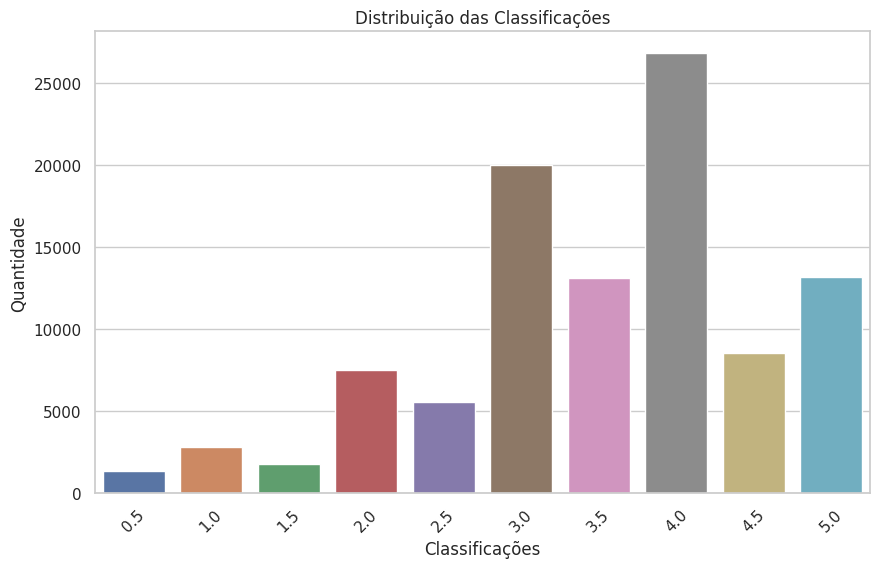

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar estilo do gráfico
sns.set(style="whitegrid")

# Plotar o gráfico de barras
plt.figure(figsize=(10, 6))  # Define o tamanho da figura
sns.barplot(x=contagem_valores.index, y=contagem_valores.values)

# Configurar rótulos e título
plt.xlabel('Classificações')
plt.ylabel('Quantidade')
plt.title('Distribuição das Classificações')

# Rotacionar rótulos do eixo x, se necessário
plt.xticks(rotation=45)

# Exibir o gráfico
plt.show()

##Aula de matemática


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dados_normalizados = scaler.fit_transform(data)
print(dados_normalizados)

[[ 5.74894663 -0.05362189 -0.04837714 ...  2.39705526 14.70276093
   3.48053624]
 [-0.15372814 -0.05362189 -0.04837714 ...  1.86011842 -0.06123831
  -0.38147487]
 [ 5.74894663 -0.05362189 -0.04837714 ...  1.86011842 -0.06123831
  -0.38147487]
 ...
 [-0.15372814 -0.05362189 -0.04837714 ... -0.28762896 -0.06123831
  -0.38147487]
 [-0.15372814 -0.05362189 -0.04837714 ... -0.28762896 -0.06123831
  -0.38147487]
 [-0.15372814 -0.05362189 -0.04837714 ... -0.28762896 -0.06123831
  -0.38147487]]


In [ ]:
import numpy as np
# calculo da matriz de covariancia
matriz_covariancia = np.cov(dados_normalizados, rowvar = False)

# print da matriz de covariancia
print("Matriz de Covariância: ")
print(matriz_covariancia)

Matriz de Covariância: 
[[ 1.00010285  0.01940182  0.053061   ...  0.26226795  0.08544322
   0.0987294 ]
 [ 0.01940182  1.00010285 -0.00259434 ...  0.03273374  0.02437551
   0.08933772]
 [ 0.053061   -0.00259434  1.00010285 ...  0.00809696 -0.00296284
   0.01596359]
 ...
 [ 0.26226795  0.03273374  0.00809696 ...  1.00010285  0.10957386
   0.24896982]
 [ 0.08544322  0.02437551 -0.00296284 ...  0.10957386  1.00010285
   0.03371605]
 [ 0.0987294   0.08933772  0.01596359 ...  0.24896982  0.03371605
   1.00010285]]


In [ ]:
# calculo dos autovalores e autovetores
autovalores, autovetores = np.linalg.eig(matriz_covariancia)
# print dos autovalores
print("Autovalores: ")
print(autovalores)
print("Autovetores: ")
print(autovetores)

Autovalores: 
[6.96584654e+01 3.06344040e+01 1.44647539e+01 1.08231879e+01
 9.94397601e+00 8.26471619e+00 6.39053443e+00 5.60943221e+00
 4.95575690e+00 4.57693853e+00 4.28693298e+00 3.88475362e+00
 3.82578172e+00 3.70293872e+00 3.50312118e+00 3.26940128e+00
 3.21306220e+00 3.09960624e+00 2.97049594e+00 2.96572470e+00
 2.89383619e+00 2.84601611e+00 2.81516182e+00 2.76086188e+00
 2.63564376e+00 2.56743249e+00 2.52760627e+00 2.47048648e+00
 2.41948756e+00 2.37547335e+00 2.35639946e+00 2.29565431e+00
 2.25495709e+00 2.21013792e+00 2.19782125e+00 2.17493629e+00
 2.11610085e+00 2.09297965e+00 2.07881626e+00 2.06483023e+00
 2.04698996e+00 1.98244683e+00 1.95993232e+00 1.92589215e+00
 1.90080706e+00 1.89180431e+00 1.86847514e+00 1.85295563e+00
 1.84289692e+00 1.82181292e+00 1.79046805e+00 1.77978555e+00
 1.76378678e+00 1.74613635e+00 1.74304261e+00 1.70261504e+00
 1.69232649e+00 1.68089200e+00 1.66215554e+00 1.65451950e+00
 1.63254165e+00 1.64903334e+00 1.62435132e+00 1.61259742e+00
 1.5996398

In [ ]:
# ordenar os autovalores e autovetores de forma decrescente
indices_ordem_decrescente = np.argsort(autovalores)[::-1]
autovalores_ordem_decrescente = autovalores[indices_ordem_decrescente]
autovetores_ordem_decrescente = autovetores[indices_ordem_decrescente]
print(autovalores_ordem_decrescente)
print(autovetores_ordem_decrescente)

[6.96584654e+01 3.06344040e+01 1.44647539e+01 1.08231879e+01
 9.94397601e+00 8.26471619e+00 6.39053443e+00 5.60943221e+00
 4.95575690e+00 4.57693853e+00 4.28693298e+00 3.88475362e+00
 3.82578172e+00 3.70293872e+00 3.50312118e+00 3.26940128e+00
 3.21306220e+00 3.09960624e+00 2.97049594e+00 2.96572470e+00
 2.89383619e+00 2.84601611e+00 2.81516182e+00 2.76086188e+00
 2.63564376e+00 2.56743249e+00 2.52760627e+00 2.47048648e+00
 2.41948756e+00 2.37547335e+00 2.35639946e+00 2.29565431e+00
 2.25495709e+00 2.21013792e+00 2.19782125e+00 2.17493629e+00
 2.11610085e+00 2.09297965e+00 2.07881626e+00 2.06483023e+00
 2.04698996e+00 1.98244683e+00 1.95993232e+00 1.92589215e+00
 1.90080706e+00 1.89180431e+00 1.86847514e+00 1.85295563e+00
 1.84289692e+00 1.82181292e+00 1.79046805e+00 1.77978555e+00
 1.76378678e+00 1.74613635e+00 1.74304261e+00 1.70261504e+00
 1.69232649e+00 1.68089200e+00 1.66215554e+00 1.65451950e+00
 1.64903334e+00 1.63254165e+00 1.62435132e+00 1.61259742e+00
 1.59963983e+00 1.585284

## Teste do modelo de recomendação de projetos

In [ ]:
projetos.head()

,projectID,title,technology_1,technology_2,technology_3
0,1,Desenvolvimento de um aplicativo de gestão de ...,Python,Flutter,Mobile
1,2,Criação de um website responsivo utilizando HT...,HTML,CSS,JavaScript
2,3,Implementação de um sistema de recomendação de...,Python,Machine Learning,Sistema Legado
3,4,Construção de um chatbot para atendimento ao c...,Python,IA,Machine Learning
4,5,Desenvolvimento de um sistema de controle de e...,Data,Gestão de Projetos,SQL


Transformando o nome das tecnologias em números, para que o modelo KNN possa entender

In [ ]:
mapeamento_tecnologias = {
    'Python': 1,
    'Flutter': 2,
    'Mobile': 3,
    'HTML': 4,
    'CSS': 5,
    'JavaScript': 6,
    'Machine Learning': 7,
    'Sistema Legado': 8,
    'IA': 9,
    'Data': 10,
    'Gestão de Projetos': 11,
    'SQL': 12,
    'Unity': 13,
    'Realidade aumentada': 14,
    'Jogos': 15,
    'C++': 16,
    'Java': 17,
    'Cibersegurança': 18,
    'React': 19,
    'Scrum': 20,
    'Nest.JS': 21,
    'OpenCV': 22,
    'Docker': 23,
    'PHP': 24,
    'Gamificação': 25,
    'AWS': 26,
    'C': 27,
    'MongoDB': 28,
    'Blockchain': 29
}

# Substituir as tecnologias pelos números no DataFrame
projetos.replace({'technology_1': mapeamento_tecnologias, 'technology_2': mapeamento_tecnologias, 'technology_3': mapeamento_tecnologias}, inplace=True)

# Exibir o projetosFrame após a substituição
print(projetos.head())


   projectID                                              title  technology_1  \
0          1  Desenvolvimento de um aplicativo de gestão de ...             1   
1          2  Criação de um website responsivo utilizando HT...             4   
2          3  Implementação de um sistema de recomendação de...             1   
3          4  Construção de um chatbot para atendimento ao c...             1   
4          5  Desenvolvimento de um sistema de controle de e...            10   

   technology_2  technology_3  
0             2             3  
1             5             6  
2             7             8  
3             9             7  
4            11            12  


Criação do dataframe de id de tecnologias

In [ ]:
# Criar o DataFrame com as colunas "idTechnology" e "title"
df_tecnologias = pd.DataFrame.from_dict(mapeamento_tecnologias, orient='index', columns=['idTechnology'])
df_tecnologias['title'] = df_tecnologias.index

# Definir o índice como a coluna "idTechnology"
df_tecnologias = df_tecnologias.set_index('idTechnology')

# Exibir o DataFrame resultante
df_tecnologias.head()


,title
idTechnology,
1,Python
2,Flutter
3,Mobile
4,HTML
5,CSS


Dataframe agora com os IDs das tecnologias

In [ ]:
projetos.head()

,projectID,title,technology_1,technology_2,technology_3
0,1,Desenvolvimento de um aplicativo de gestão de ...,1,2,3
1,2,Criação de um website responsivo utilizando HT...,4,5,6
2,3,Implementação de um sistema de recomendação de...,1,7,8
3,4,Construção de um chatbot para atendimento ao c...,1,9,7
4,5,Desenvolvimento de um sistema de controle de e...,10,11,12


Sistema de recomendação de projetos

In [ ]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors

# Definir as features (tecnologias) para o modelo de recomendação
features = ['technology_1', 'technology_2', 'technology_3']  # Substitua pelas suas colunas de tecnologia

# Criar uma matriz de features
X = projetos[features].values.reshape(-1, len(features))  # Ajustar o formato da matriz de features


# Construir o modelo KNN
k = 30  # Número de vizinhos a serem considerados
knn = NearestNeighbors(n_neighbors=k, algorithm='brute')
knn.fit(X)

# Função para recomendar um projeto com base no número da tecnologia informada
def recomendar_projetos(numero_tecnologia, num_projetos=3):
    input_tecnologia = [numero_tecnologia] * len(features)  # Repetir o número da tecnologia para cada feature

    # Encontrar os vizinhos mais próximos
    _, indices = knn.kneighbors([input_tecnologia])

    # Recuperar os projetos recomendados dos vizinhos mais próximos
    projetos_recomendados = projetos.iloc[indices[0][:num_projetos]]['title'].tolist()

    return projetos_recomendados

# Exemplo de uso
input_numero_tecnologia = int(input("Digite o número da tecnologia: "))
projetos_recomendados = recomendar_projetos(input_numero_tecnologia)

print("Projetos recomendados:")
for projeto in projetos_recomendados:
    print(projeto)

Digite o número da tecnologia: 90
Projetos recomendados:
Construção de um sistema de recomendação de produtos baseado em filtros colaborativos
Desenvolvimento de um aplicativo de delivery de medicamentos com geolocalização
Implementação de um algoritmo de busca e ordenação em Java


In [ ]:
import pickle

# Treinamento do modelo de recomendação
# ...

# Salvando o modelo usando o pickle
# modelo = seu_modelo_de_recomendacao()
modelo = projetos_recomendados
nome_arquivo = 'modelo_recomendacao.pkl'
pickle.dump(modelo, open(nome_arquivo, 'wb'))

print("Modelo salvo com sucesso!")

# Exemplo de carregamento do modelo
# Carregar o modelo de um arquivo
modelo_carregado = pickle.load(open(nome_arquivo, 'rb'))

# Usar o modelo carregado para fazer previsões
# ...



Modelo salvo com sucesso!


In [ ]:
import os

# Obter o diretório atual
diretorio_atual = os.getcwd()

# Exibir o conteúdo do diretório
conteudo_diretorio = os.listdir(diretorio_atual)

print(f"Diretório atual: {diretorio_atual}")
print("Conteúdo do diretório:")
for item in conteudo_diretorio:
    print(item)


Diretório atual: /content
Conteúdo do diretório:
.config
modelo_recomendacao.pkl
drive
sample_data


In [ ]:
# Copiar o arquivo para o Google Drive
!cp modelo_recomendacao.pkl /content/drive/MyDrive/
